# yfinance의 기본구조

In [1]:
import yfinance as yf

### 티커 객체 정의하기

`yfinance`를 사용하기 위해서는 먼저 티커를 선택하고 이를 객체화하는 작업이 필요합니다. 티커(Ticker)란 금융시장에서 특정 종목을 표현하는 약자를 의미합니다. 가령 애플의 경우 주식시장에서 'AAPL'이라는 티커를 가지고 있고, 마이크로소프트의 경우 'MSFT'라는 티커를 가지고 있습니다. 이 티커는 당연히 각 종목별로 고유한 값입니다. `yfinance`에서는 티커를 객체화하기 위해 `Ticker()`라는 메서드를 사용하고 있습니다. 여기서는 간단하게 애플의 티커 객체를 구현해보겠습니다.

In [2]:
aapl = yf.Ticker('AAPL')
print(aapl)

yfinance.Ticker object <AAPL>


### 종목 기본정보

이제 티커를 정의했으니 해당 종목이 어떤 종목인지 기본적인 정보를 출력해보겠습니다. 티커 객체는 `info`라는 속성(Attribute)을 가지고 있습니다. 이를 활용하면 종목에 대한 세세한 정보를 얻을 수 있습니다. 

In [3]:
aapl.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

### 시장 데이터 다운로드

종목의 과거 가격 및 거래량에 대한 데이터를 다운받기 위해서는 `history()`라는 메서드를 사용하면 됩니다. 이 메서드는 단일 종목 혹은 여러 종목들에 대한 시장 데이터를 가져와 우리에게 전달해주는 역할을 하고 있습니다.

우선 가장 단순하게 구현을 하기 위해 애플 주식의 가능한 한 많은 일별 데이터를 가져와보도록 하겠습니다.

In [4]:
data = aapl.history(period='max')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-28 00:00:00-04:00,187.929993,189.899994,187.600006,189.250000,51216800,0.0,0.0
2023-06-29 00:00:00-04:00,189.080002,190.070007,188.940002,189.589996,46347300,0.0,0.0
2023-06-30 00:00:00-04:00,191.630005,194.479996,191.259995,193.970001,85069600,0.0,0.0


애플 주식에 대한 과거 데이터가 잘 들어오는 것을 확인할 수 있습니다. 간단히 종가를 기준으로 가격 그래프를 만들어보겠습니다. 앞으로 우리는 이 `history()` 메서드를 사용하여 여러 ETF들에 대한 과거 데이터를 다운받아 사용할 것입니다.

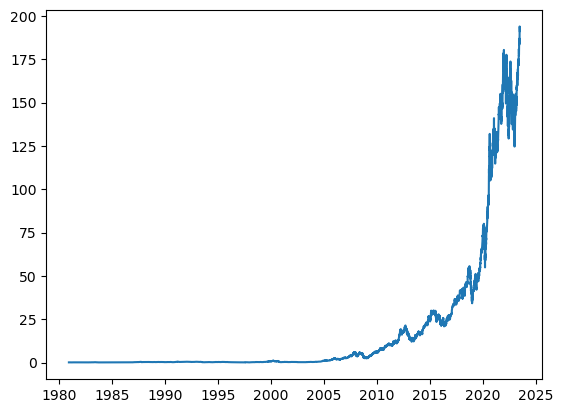

In [5]:
import matplotlib.pyplot as plt
plt.plot(data['Close'])

`history()` 메서드는 몇 가지 인자를 받아 이에 맞게 데이터 쿼리 작업을 처리할 수 있습니다. 아래는 `history()` 메서드가 가지고 있는 인자(Parameter)와 이에 대한 설명입니다.


- `period` : 데이터를 다운받을 기간을 설정합니다. 기본값은 한달(`1mo`)입니다. (`1d`, `5d`, `1mo`, `3mo`, `6mo`, `1y`, `2y`, `5y`, `10y`, `ytd`, `max`)
- `interval` : 데이터의 주기를 설정합니다. 주기를 일별보다 낮은 장중으로 설정할 경우 최대 60일간의 데이터만 제공합니다. 기본값은 하루(`1d`)입니다. (`1m`, `2m`, `5m`, `15m`, `30m`, `60m`, `90m`, `1h`, `1d`, `5d`, `1wk`, `1mo`, `3mo`)
- `start` : `period` 인자를 사용하지 않을 경우 데이터의 시작일을 설정합니다. `'YYYY-MM-DD'` 문자열을 사용하거나 `datetime` 형식의 날짜를 사용합니다.
- `end` : `period` 인자를 사용하지 않을 경우 데이터의 종료일을 설정합니다. `'YYYY-MM-DD'` 문자열을 사용하거나 `datetime` 형식의 날짜를 사용합니다.
- `prepost` : 시간외거래의 데이터를 결과에 포함시킬것인지를 설정합니다. 기본값은 `False`입니다.
- `auto_adjust` : 자동으로 수정주가를 사용할 것인지를 설정합니다. 기본값은 `True`입니다.
- `actions` : 주식의 경우 배당이나 주식 분할 같은 기업공시 이벤트를 다운받을지를 설정합니다. 기본값은 `True`입니다.

In [6]:
data = aapl.history(start='2015-01-01', end='2022-03-11', actions=False)
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-04 00:00:00-05:00,163.273733,164.325892,160.901405,161.963486,83737200
2022-03-07 00:00:00-05:00,162.152078,163.799807,157.864014,158.122101,96418800
2022-03-08 00:00:00-05:00,157.645649,161.675626,154.647976,156.275848,131148300
2022-03-09 00:00:00-05:00,160.285985,162.201723,158.231299,161.745117,91454900
2022-03-10 00:00:00-05:00,159.015440,159.204038,154.826643,157.347870,105342000


<Axes: xlabel='Date'>

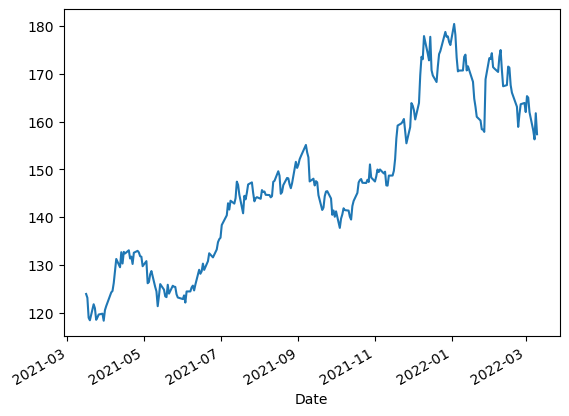

In [7]:
data['Close'].iloc[-250:].plot()

### 기타 데이터 다운로드

`yfinance`는 가격 데이터 뿐만 아니라 재무 데이터, 대주주 보유 현황, 애널리스트 의견, 뉴스 데이터 또한 제공합니다. 아래의 리스트는 `yfinance`를 통해 얻을 수 있는 주요 데이터를 가져올 수 있는 속성값들입니다.

- `financials` : 연도별 재무제표
- `quarterly_financials` : 분기별 재무제표
- `balance_sheet` : 연도별 대차대조표
- `quarterly_balance_sheet` : 분기별 대차대조표
- `cashflow` : 연도별 현금흐름표
- `quaterly_cashflow` : 분기별 현금흐름표
- `earnings` : 연도별 실적
- `quarterly_earnings` : 분기별 실적
- `institutional_holders` : 주요 기관 대주주 보유현황
- `recommendations` : 애널리스트 의견
- `news` : 최근 뉴스

In [8]:
# 연도별 재무제표
aapl.financials

,2022-09-30,2021-09-30,2020-09-30,2019-09-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.162045,0.133023,0.144282,0.159438
Normalized EBITDA,130541000000.0,120233000000.0,77344000000.0,76477000000.0
Net Income From Continuing Operation Net Minority Interest,99803000000.0,94680000000.0,57411000000.0,55256000000.0
Reconciled Depreciation,11104000000.0,11284000000.0,11056000000.0,12547000000.0
Reconciled Cost Of Revenue,223546000000.0,212981000000.0,169559000000.0,161782000000.0
EBIT,119437000000.0,108949000000.0,66288000000.0,63930000000.0
Net Interest Income,-106000000.0,198000000.0,890000000.0,1385000000.0
Interest Expense,2931000000.0,2645000000.0,2873000000.0,3576000000.0
Interest Income,2825000000.0,2843000000.0,3763000000.0,4961000000.0


In [9]:
# 분기별 재무제표
aapl.quarterly_financials

,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.148756,0.157904,0.15963,0.157114
Normalized EBITDA,31216000000.0,38932000000.0,27759000000.0,25881000000.0
Net Income From Continuing Operation Net Minority Interest,24160000000.0,29998000000.0,20721000000.0,19442000000.0
Reconciled Depreciation,2898000000.0,2916000000.0,2865000000.0,2805000000.0
Reconciled Cost Of Revenue,52860000000.0,66822000000.0,52051000000.0,47074000000.0
EBIT,28318000000.0,36016000000.0,24894000000.0,23076000000.0
Net Interest Income,-12000000.0,-135000000.0,-74000000.0,3000000.0
Interest Expense,930000000.0,1003000000.0,827000000.0,719000000.0
Interest Income,918000000.0,868000000.0,753000000.0,722000000.0


In [10]:
# 연도별 대차대조표
aapl.balance_sheet

,2022-09-30,2021-09-30,2020-09-30,2019-09-30
Ordinary Shares Number,15943425000.0,16426786000.0,16976763000.0,17772944000.0
Share Issued,15943425000.0,16426786000.0,16976763000.0,17772944000.0
Net Debt,96423000000.0,89779000000.0,74420000000.0,59203000000.0
Total Debt,120069000000.0,124719000000.0,112436000000.0,108047000000.0
Tangible Book Value,50672000000.0,63090000000.0,65339000000.0,90488000000.0
Invested Capital,170741000000.0,187809000000.0,177775000000.0,198535000000.0
Working Capital,-18577000000.0,9355000000.0,38321000000.0,57101000000.0
Net Tangible Assets,50672000000.0,63090000000.0,65339000000.0,90488000000.0
Common Stock Equity,50672000000.0,63090000000.0,65339000000.0,90488000000.0
Total Capitalization,149631000000.0,172196000000.0,164006000000.0,182295000000.0


In [11]:
# 분기별 대차대조표
aapl.quarterly_balance_sheet

,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Ordinary Shares Number,15723406000.0,15842407000.0,15943425000.0,16095378000.0
Share Issued,15723406000.0,15842407000.0,15943425000.0,16095378000.0
Net Debt,84928000000.0,90575000000.0,96423000000.0,92189000000.0
Total Debt,109615000000.0,111110000000.0,120069000000.0,119691000000.0
Tangible Book Value,62158000000.0,56727000000.0,50672000000.0,58107000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,55872000000.0,51355000000.0,48304000000.0,48231000000.0
Other Short Term Investments,31185000000.0,30820000000.0,24658000000.0,20729000000.0
Cash And Cash Equivalents,24687000000.0,20535000000.0,23646000000.0,27502000000.0
Cash Equivalents,4637000000.0,2627000000.0,5100000000.0,14650000000.0


In [12]:
# 연도별 현금흐름표
aapl.cashflow

,2022-09-30,2021-09-30,2020-09-30,2019-09-30
Free Cash Flow,111443000000.0,92953000000.0,73365000000.0,58896000000.0
Repurchase Of Capital Stock,-89402000000.0,-85971000000.0,-72358000000.0,-66897000000.0
Repayment Of Debt,-9543000000.0,-8750000000.0,-13592000000.0,-8805000000.0
Issuance Of Debt,9420000000.0,20393000000.0,16091000000.0,6963000000.0
Issuance Of Capital Stock,NaN,1105000000.0,880000000.0,781000000.0
Capital Expenditure,-10708000000.0,-11085000000.0,-7309000000.0,-10495000000.0
Interest Paid Supplemental Data,2865000000.0,2687000000.0,3002000000.0,3423000000.0
Income Tax Paid Supplemental Data,19573000000.0,25385000000.0,9501000000.0,15263000000.0
End Cash Position,24977000000.0,35929000000.0,39789000000.0,50224000000.0
Beginning Cash Position,35929000000.0,39789000000.0,50224000000.0,25913000000.0


In [13]:
# 분기별 현금흐름표
aapl.quarterly_cashflow

,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Free Cash Flow,25644000000.0,30218000000.0,20838000000.0,20790000000.0
Repurchase Of Capital Stock,-19594000000.0,-19475000000.0,-24428000000.0,-21865000000.0
Repayment Of Debt,5964000000.0,-9615000000.0,-2793000000.0,-3000000000.0
Issuance Of Debt,NaN,NaN,4450000000.0,3971000000.0
Capital Expenditure,-2916000000.0,-3787000000.0,-3289000000.0,-2102000000.0
Interest Paid Supplemental Data,1170000000.0,703000000.0,955000000.0,504000000.0
Income Tax Paid Supplemental Data,4066000000.0,828000000.0,7322000000.0,2950000000.0
End Cash Position,27129000000.0,21974000000.0,24977000000.0,28861000000.0
Beginning Cash Position,21974000000.0,24977000000.0,28861000000.0,29180000000.0
Changes In Cash,5155000000.0,-3003000000.0,-3884000000.0,-319000000.0


In [14]:
# 주요 기관 보유현황
aapl.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1309785362,2023-03-30,0.0833,250601235709
1,Blackrock Inc.,1035008939,2023-03-30,0.0658,198028262194
2,"Berkshire Hathaway, Inc",915560382,2023-03-30,0.0582,175174169564
3,State Street Corporation,576281774,2023-03-30,0.0366,110259992874
4,"FMR, LLC",311437576,2023-03-30,0.0198,59587351986
5,"Geode Capital Management, LLC",285171112,2023-03-30,0.0181,54561789381
6,Price (T.Rowe) Associates Inc,234017381,2023-03-30,0.0149,44774545935
7,Morgan Stanley,200615893,2023-03-30,0.0128,38383839175
8,Northern Trust Corporation,173130542,2023-03-30,0.0110,33125066917
9,Norges Bank Investment Management,167374278,2022-12-30,0.0106,32023720916


In [15]:
# 최근 뉴스
aapl.news

[{'uuid': 'd7b6e8db-b4d6-3e29-a4c5-f39c13d5b09b',
  'title': 'Dow Jones Today: Index Drops on Fed Minutes',
  'publisher': 'Investopedia',
  'link': 'https://finance.yahoo.com/m/d7b6e8db-b4d6-3e29-a4c5-f39c13d5b09b/dow-jones-today%3A-index-drops.html',
  'providerPublishTime': 1688590188,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/yokoJ.Y_.nWrf3wWAnMhBg--~B/aD00MDAwO3c9NjAwMDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/investopedia.com/14a6fe76629deef9fc4680964a3b75d5',
     'width': 6000,
     'height': 4000,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/eq0pl2Hz5PJwZMyey2Jv9g--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/investopedia.com/14a6fe76629deef9fc4680964a3b75d5',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['^DJI', 'AAPL', 'BA', 'CVX', 'NKE']},
 {'uuid': '94927afb-d2b1-3973-bb54-5d4bb962112c',
  'title': 'Apple (

# yfinance로 ETF 가격 데이터 다운로드하기

### 여러 종목 데이터 한꺼번에 받기

지금까지는 단일 종목에 대한 데이터 쿼리에 대해서만 다루었습니다. 그런데 만약  여러 종목들에 대한 데이터를 한꺼번에 받고 싶다면 어떻게 해야할까요? 이런 경우에도 방법은 똑같습니다. 다만 여러 종목들에 대한 티커 객체를 만들고자 한다면 `Ticker()` 메서드가 아닌 `Tickers()` 메서드를 사용해야 합니다. SPY와 TLT, 두 가지 ETF의 가격 데이터를 다운로드해보겠습니다. SPY는 S&P 500 지수를 추종하는 ETF이며, TLT는 미국 장기채를 추종하는 ETF입니다. 각각 미국 주식과 미국 채권을 대표하는 ETF라고 할 수 있습니다.

In [16]:
tickers = ['SPY', 'TLT']

etf = yf.Tickers(tickers)

data = etf.history(start='2002-08-01', actions=False)
data

[*********************100%***********************]  2 of 2 completed


Close                    High                     Low  \
                   SPY         TLT         SPY         TLT         SPY   
Date                                                                     
2002-08-01   59.474281   41.341740   61.195940   41.351700   59.172826   
2002-08-02   58.141197   41.765095   59.561401   41.889618   57.357408   
2002-08-05   56.118053   41.949402   58.234960   42.058983   55.970678   
2002-08-06   58.007202   41.590729   58.884783   41.789967   57.015743   
2002-08-07   59.018757   41.690376   59.286720   41.909538   57.457874   
...                ...         ...         ...         ...         ...   
2023-06-28  436.390015  103.330185  437.440002  103.559560  434.410004   
2023-06-29  438.109985  101.465233  438.279999  102.063611  435.540009   
2023-06-30  443.279999  102.662003  444.299988  102.781674  441.109985   
2023-07-03  443.790009  102.080002  444.079987  103.260002  442.630005   
2023-07-05  443.130005  101.110001  443.890015  102.000000  441.899994   

                              Open                 Volume            
                   TLT         SPY         TLT        SPY       TLT  
Date                                                                 
2002-08-01   41.112617   60.881084   41.112617   66571900     25000  
2002-08-02   41.281944   59.286737   41.421413   51772900     52800  
2002-08-05   41.765106   57.940200   41.859745   47191300     61100  
2002-08-06   41.451263   57.096134   41.775024   64730000     64900  
2002-08-07   41.521027   58.864681   41.640568   43289400     40300  
...                ...         ...         ...        ...       ...  
2023-06-28  102.552293  435.049988  103.130728   75636000  23826800  
2023-06-29  101.176015  435.959991  101.894072   67882300  41091600  
2023-06-30  101.594893  441.440002  101.784374  104921500  32018800  
2023-07-03  102.059998  442.920013  102.839996   32793400  16011800  
2023-07-05  100.739998  441.910004  101.889999   58367300  28153600  

[5267 rows x 10 columns]

각각의 ETF에 대해 OHLCV 데이터가 들어오는 것을 확인할 수 있습니다. 만약 종가 데이터만 필요하다면 판다스 데이터프레임의 [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)과 [`droplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html) 메서드를 사용해 데이터를 축약할 수 있습니다.

In [17]:
data.drop(['Open', 'Low', 'High', 'Volume'], inplace=True, axis=1)
data

Close            
                   SPY         TLT
Date                              
2002-08-01   59.474281   41.341740
2002-08-02   58.141197   41.765095
2002-08-05   56.118053   41.949402
2002-08-06   58.007202   41.590729
2002-08-07   59.018757   41.690376
...                ...         ...
2023-06-28  436.390015  103.330185
2023-06-29  438.109985  101.465233
2023-06-30  443.279999  102.662003
2023-07-03  443.790009  102.080002
2023-07-05  443.130005  101.110001

[5267 rows x 2 columns]

In [18]:
data = data.droplevel(0, axis=1)
data

,SPY,TLT
Date,,
2002-08-01,59.474281,41.341740
2002-08-02,58.141197,41.765095
2002-08-05,56.118053,41.949402
2002-08-06,58.007202,41.590729
2002-08-07,59.018757,41.690376
...,...,...
2023-06-28,436.390015,103.330185
2023-06-29,438.109985,101.465233
2023-06-30,443.279999,102.662003


<Axes: xlabel='Date'>

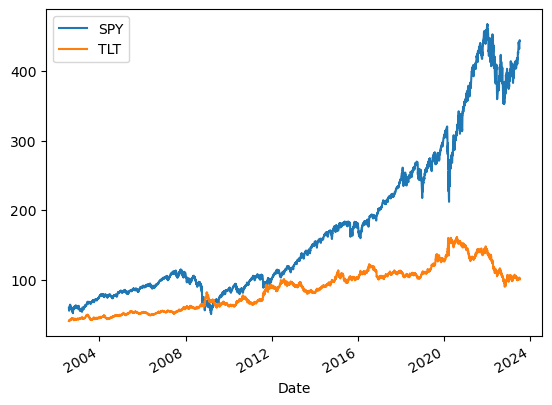

In [19]:
data.plot()

### 입력변수: 수익률, 변동성, 상관계수

#### 1. 수익률

Text(0, 0.5, 'Returns')

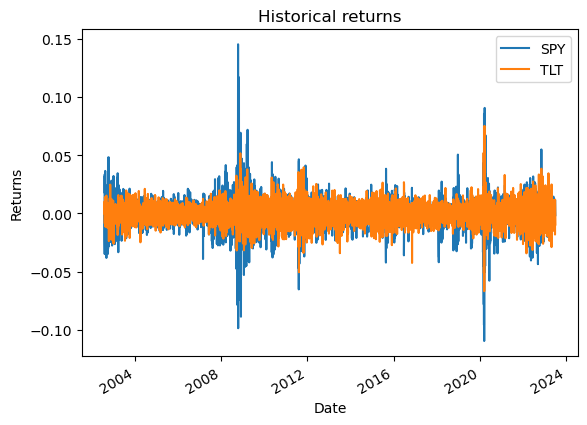

In [20]:
# 수익률 계산
rets = data.pct_change().fillna(0)

# 수익률 데이터 확인
rets.head()

# 수익률 데이터 시각화
rets.plot()
plt.title('Historical returns')
plt.xlabel('Date')
plt.ylabel('Returns')

#### 2. 변동성

In [21]:
import numpy as np

Text(0, 0.5, 'Vols')

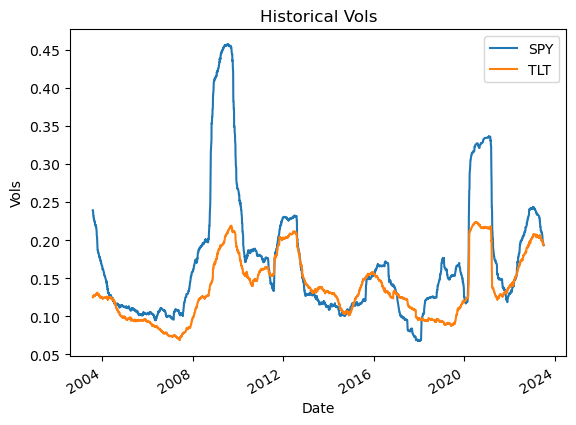

In [22]:
# 전체 기간 변동성 계산
total_vols = rets.std() * np.sqrt(252)
total_vols

# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(252).std() * np.sqrt(252)
vols

# 변동성 시각화
vols.plot()
plt.title('Historical Vols')
plt.xlabel('Date')
plt.ylabel('Vols')

#### 3. 상관계수

Text(0, 0.5, 'Correlation')

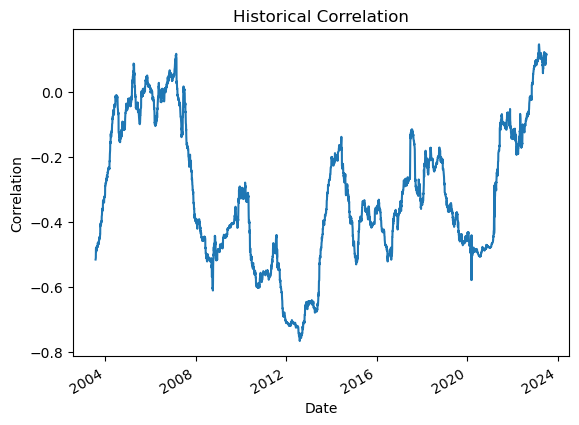

In [23]:
# SPY와 TLT의 수익률
spy_rets = rets['SPY']
tlt_rets = rets['TLT']

# 전체 기간 상관계수 계산
total_corr = spy_rets.corr(tlt_rets)
total_corr

# 1년 단위 롤링 상관계수 계산
corr = spy_rets.rolling(252).corr(tlt_rets)
corr

# 상관계수 시각화
corr.plot()
plt.title('Historical Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')

#### 4. ETF 유니버스 데이터 처리

#### ETF 유니버스

| Ticker | Sector |
| ------ | -----  |
| XLB | 소재 |
| XLE | 에너지 |
| XLF | 금융 |
| XLI | 산업재 |
| XLK | IT |
| XLP | 필수소비재 |
| XLU | 유틸리티 |
| XLV | 헬스케어 |
| XLY | 임의소비재 |

In [24]:
# ETF 유니버스 티커 설정
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

# 티커 객체 선언
yfObj = yf.Tickers(tickers)

# 과거 데이터 다운로드
df = yfObj.history(start='2011-01-01', end='2022-10-14')

# 종가를 제외한 나머지 컬럼 삭제
df.drop(['Capital Gains', 'Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], inplace=True, axis=1)

# NaN 값을 이전 값으로 채워넣기
df.ffill(inplace=True)

# 첫 번째 칼럼 레벨 삭제
df = df.droplevel(0, axis=1)

# 주간 단위로 데이터 재설정
df = df.resample('W').last()

[*********************100%***********************]  9 of 9 completed


In [25]:
df

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2011-01-09,29.575191,44.580612,10.423411,27.640413,21.443029,20.788729,20.468708,25.956953,32.091446
2011-01-16,29.953468,46.128006,10.744726,28.149952,21.792776,21.003557,20.572405,26.045980,32.278702
2011-01-23,28.934437,45.768909,10.577644,28.142117,21.418043,21.118137,20.708517,26.054073,32.193577
2011-01-30,29.189203,46.428337,10.442691,28.087244,21.509644,20.752920,20.514072,25.584637,31.580694
2011-02-06,30.555635,48.400116,10.674038,28.831949,22.225796,20.982071,20.611294,26.167397,32.525566
...,...,...,...,...,...,...,...,...,...
2022-09-18,71.361511,75.346054,32.375389,87.651688,127.476387,69.534477,72.250740,125.415764,156.386475
2022-09-25,67.364716,68.438148,30.566971,83.668198,122.856598,68.073509,70.093040,121.252510,145.283340
2022-10-02,66.951256,69.933533,29.887705,81.782570,117.932007,65.473419,63.988232,119.652008,141.344162


<Axes: xlabel='Date'>

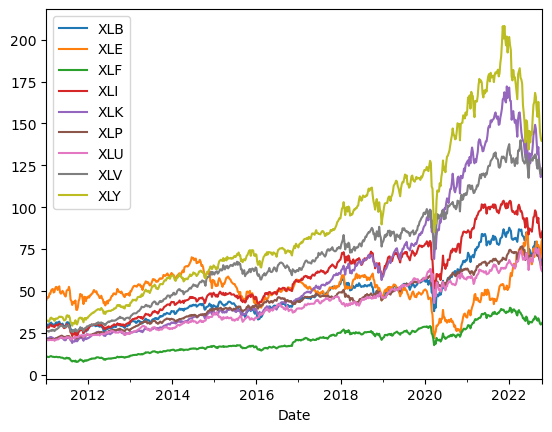

In [26]:
# 역사적 가격 그래프 시각화
df.plot()

<Axes: xlabel='Date'>

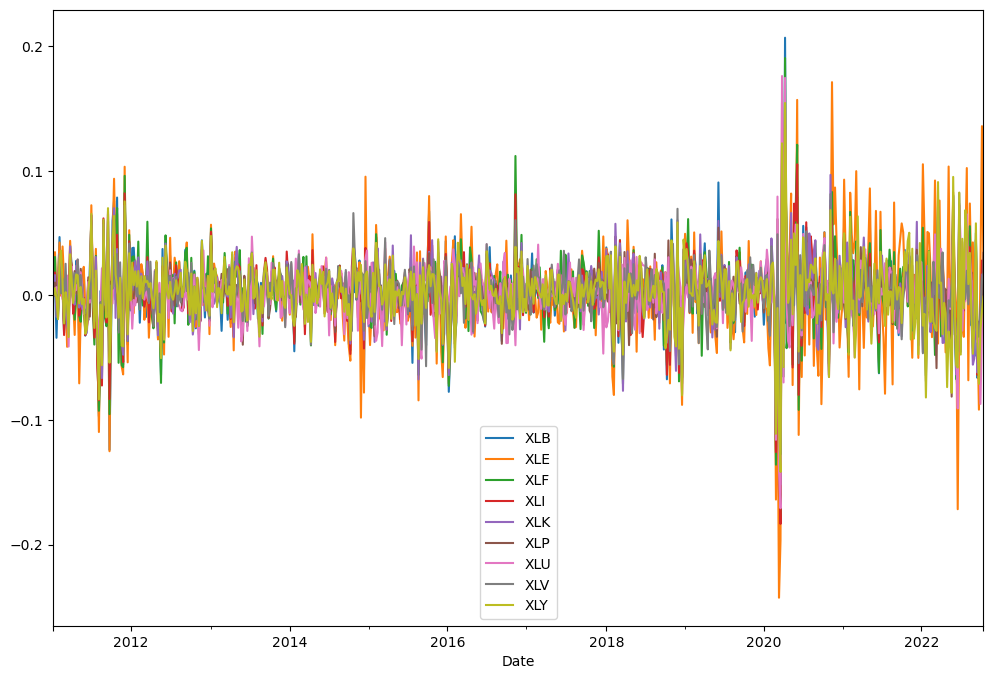

In [27]:
# ETF 수익률 계산
rets = df.pct_change().fillna(0)

# 수익률 시각화
rets.plot(figsize=(12, 8))

<Axes: xlabel='Date'>

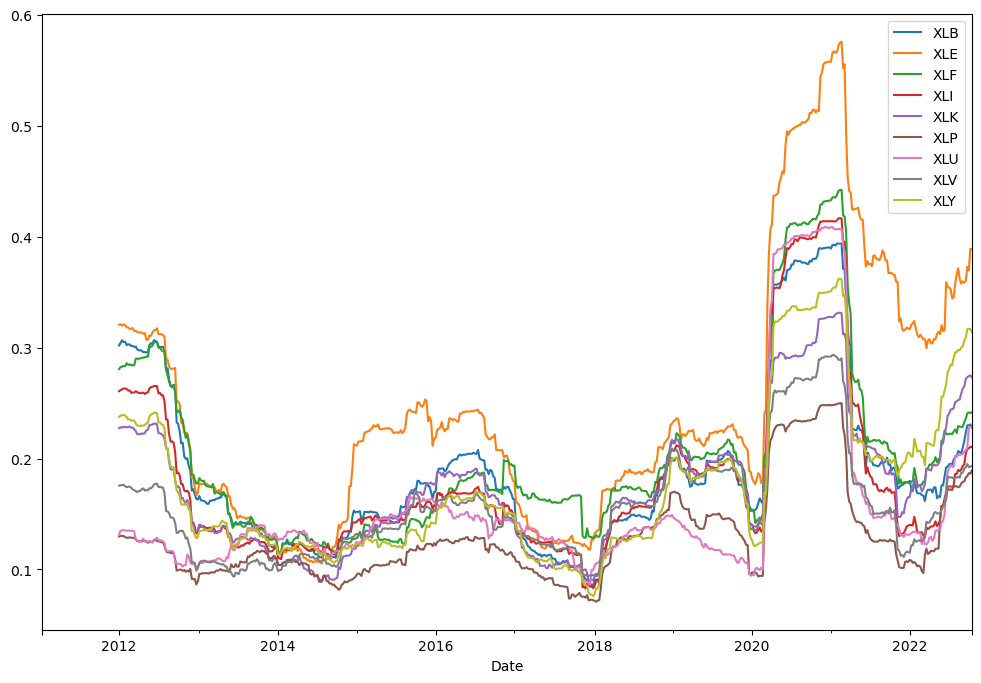

In [28]:
# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(52).std() * np.sqrt(52)

# 변동성 시각화
vols.plot(figsize=(12, 8))

In [29]:
# 전체 기간 ETF 상관계수 계산
corr = rets.corr()
corr

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,1.000000,0.719690,0.829266,0.886239,0.737776,0.612623,0.502272,0.684392,0.774423
XLE,0.719690,1.000000,0.705963,0.732264,0.513576,0.470045,0.382715,0.498355,0.552228
XLF,0.829266,0.705963,1.000000,0.887685,0.715744,0.619180,0.492558,0.675951,0.780121
XLI,0.886239,0.732264,0.887685,1.000000,0.791119,0.695931,0.572718,0.723719,0.831997
XLK,0.737776,0.513576,0.715744,0.791119,1.000000,0.680499,0.492137,0.735613,0.868778
XLP,0.612623,0.470045,0.619180,0.695931,0.680499,1.000000,0.677202,0.718564,0.690610
XLU,0.502272,0.382715,0.492558,0.572718,0.492137,0.677202,1.000000,0.569009,0.537086
XLV,0.684392,0.498355,0.675951,0.723719,0.735613,0.718564,0.569009,1.000000,0.726925
XLY,0.774423,0.552228,0.780121,0.831997,0.868778,0.690610,0.537086,0.726925,1.000000


<Axes: >

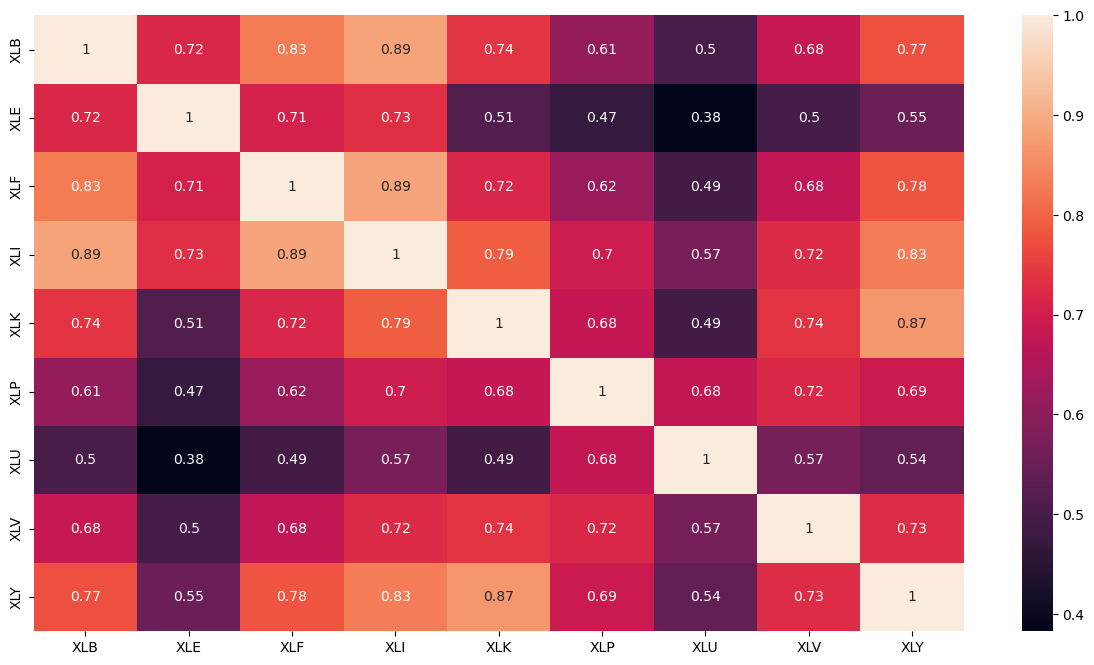

In [30]:
# seaborn 패키지 임포트
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

##### 공분산 행렬 특징 이해하기

In [31]:
# 공분산 계산 및 연율화
cov = rets.cov() * 52
cov

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,0.043178,0.041900,0.037557,0.036560,0.029055,0.017391,0.018630,0.023177,0.031572
XLE,0.041900,0.078500,0.043111,0.040731,0.027271,0.017992,0.019141,0.022756,0.030356
XLF,0.037557,0.043111,0.047506,0.038411,0.029566,0.018437,0.019163,0.024011,0.033360
XLI,0.036560,0.040731,0.038411,0.039413,0.029766,0.018875,0.020296,0.023416,0.032407
XLK,0.029055,0.027271,0.029566,0.029766,0.035919,0.017620,0.016649,0.022721,0.032305
XLP,0.017391,0.017992,0.018437,0.018875,0.017620,0.018665,0.016515,0.015999,0.018511
XLU,0.018630,0.019141,0.019163,0.020296,0.016649,0.016515,0.031863,0.016553,0.018810
XLV,0.023177,0.022756,0.024011,0.023416,0.022721,0.015999,0.016553,0.026561,0.023244
XLY,0.031572,0.030356,0.033360,0.032407,0.032305,0.018511,0.018810,0.023244,0.038494


In [32]:
# var() 메서드를 사용한 ETF 분산 계산
vols_1 = rets.var() * 52
vols_1

XLB    0.043178
XLE    0.078500
XLF    0.047506
XLI    0.039413
XLK    0.035919
XLP    0.018665
XLU    0.031863
XLV    0.026561
XLY    0.038494
dtype: float64

In [33]:
# 공분산 행렬 및 diag() 메서드를 사용한 ETF 분산 계산
vols_2 = np.diag(cov)
vols_2

array([0.04317776, 0.07850002, 0.04750552, 0.03941325, 0.0359186 ,
       0.01866471, 0.03186309, 0.02656079, 0.03849365])

# 주식-채권 배분 모델

### 패키지 임포트

In [34]:
# 패키지 임포트
import numpy as np
import yfinance as yf
import seaborn as sns
sns.set()

### 가격 데이터 다운로드 및 전처리

In [35]:
# 티커
tickers = ['SPY', 'TLT']

# 티커 객체
etf = yf.Tickers(tickers)

# 데이터 다운로드
data = etf.history(start='2002-08-01', actions=False)
data

[*********************100%***********************]  2 of 2 completed


Close                    High                     Low  \
                   SPY         TLT         SPY         TLT         SPY   
Date                                                                     
2002-08-01   59.474281   41.341713   61.195940   41.351673   59.172826   
2002-08-02   58.141186   41.765095   59.561389   41.889618   57.357396   
2002-08-05   56.118057   41.949387   58.234964   42.058968   55.970682   
2002-08-06   58.007195   41.590763   58.884775   41.790001   57.015736   
2002-08-07   59.018761   41.690384   59.286724   41.909546   57.457877   
...                ...         ...         ...         ...         ...   
2023-06-28  436.390015  103.330185  437.440002  103.559560  434.410004   
2023-06-29  438.109985  101.465233  438.279999  102.063611  435.540009   
2023-06-30  443.279999  102.662003  444.299988  102.781674  441.109985   
2023-07-03  443.790009  102.080002  444.079987  103.260002  442.630005   
2023-07-05  443.130005  101.110001  443.890015  102.000000  441.899994   

                              Open                 Volume            
                   TLT         SPY         TLT        SPY       TLT  
Date                                                                 
2002-08-01   41.112591   60.881084   41.112591   66571900     25000  
2002-08-02   41.281944   59.286725   41.421413   51772900     52800  
2002-08-05   41.765091   57.940203   41.859730   47191300     61100  
2002-08-06   41.451298   57.096126   41.775059   64730000     64900  
2002-08-07   41.521034   58.864685   41.640575   43289400     40300  
...                ...         ...         ...        ...       ...  
2023-06-28  102.552293  435.049988  103.130728   75636000  23826800  
2023-06-29  101.176015  435.959991  101.894072   67882300  41091600  
2023-06-30  101.594893  441.440002  101.784374  104921500  32018800  
2023-07-03  102.059998  442.920013  102.839996   32793400  16011800  
2023-07-05  100.739998  441.910004  101.889999   58367300  28153600  

[5267 rows x 10 columns]

In [36]:
# 불필요한 칼럼 제거
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data

Close            
                   SPY         TLT
Date                              
2002-08-01   59.474281   41.341713
2002-08-02   58.141186   41.765095
2002-08-05   56.118057   41.949387
2002-08-06   58.007195   41.590763
2002-08-07   59.018761   41.690384
...                ...         ...
2023-06-28  436.390015  103.330185
2023-06-29  438.109985  101.465233
2023-06-30  443.279999  102.662003
2023-07-03  443.790009  102.080002
2023-07-05  443.130005  101.110001

[5267 rows x 2 columns]

In [37]:
# 0 레벨 칼럼 제목 제거
data = data.droplevel(0, axis=1)
data

,SPY,TLT
Date,,
2002-08-01,59.474281,41.341713
2002-08-02,58.141186,41.765095
2002-08-05,56.118057,41.949387
2002-08-06,58.007195,41.590763
2002-08-07,59.018761,41.690384
...,...,...
2023-06-28,436.390015,103.330185
2023-06-29,438.109985,101.465233
2023-06-30,443.279999,102.662003


<Axes: xlabel='Date'>

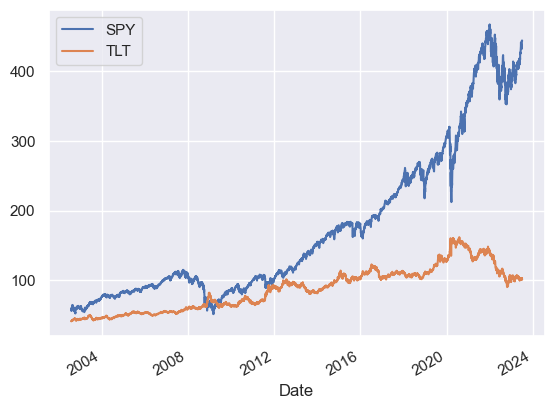

In [38]:
# 가격 그래프
data.plot()

### 일별 수익률 데이터

<Axes: xlabel='Date'>

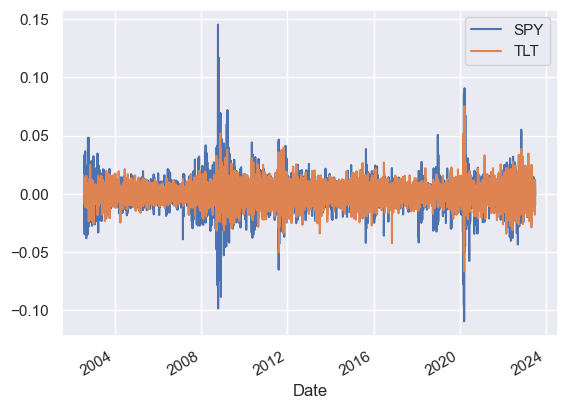

In [39]:
# 일별 수익률 데이터
rets = data.pct_change().fillna(0)

# 수익률 데이터 시각화
rets.plot()

### 개별 자산 평균 수익률과 변동성, 샤프비율

In [40]:
# 주식 기대 수익률과 변동성
stock_mu = rets['SPY'].mean() * 252
stock_sigma = rets['SPY'].std() * np.sqrt(252)

# 주식 샤프 비율
stock_sr = stock_mu / stock_sigma

# 채권 기대 수익률과 변동성
bond_mu = rets['TLT'].mean() * 252
bond_sigma = rets['TLT'].std() * np.sqrt(252)

# 채권 샤프 비율
bond_sr = bond_mu / bond_sigma

# 결과 출력
print(stock_sr, bond_sr)

0.5951836841465739 0.36978766849717665


### 60-40 포트폴리오 구현

In [41]:
# 주식 가중치 60%, 채권 가중치 40%
weights = 0.6

In [42]:
# 포트폴리오 수익률
port_ret = weights * rets['SPY'] + (1 - weights) * rets['TLT']

In [43]:
# NaN 값 제거
port_ret.dropna(inplace=True)

In [44]:
# 결과 출력
port_ret

Date
2002-08-01    0.000000
2002-08-02   -0.009352
2002-08-05   -0.019113
2002-08-06    0.016779
2002-08-07    0.011421
                ...   
2023-06-28    0.002009
2023-06-29   -0.004855
2023-06-30    0.011798
2023-07-03   -0.001577
2023-07-05   -0.004693
Length: 5267, dtype: float64

<Axes: xlabel='Date'>

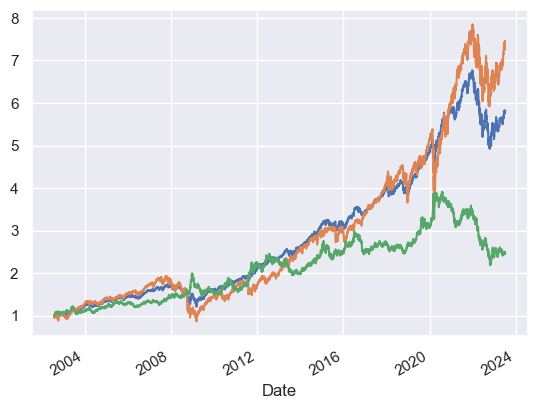

In [45]:
# 그래프 시각화
(1 + port_ret).cumprod().plot()
(1 + rets['SPY']).cumprod().plot()
(1 + rets['TLT']).cumprod().plot()

### 포트폴리오 수익률과 변동성 분석

In [46]:
# 포트폴리오 기대수익률
port_mu = port_ret.mean() * 252

# 포트폴리오 변동성
port_sigma = port_ret.std() * np.sqrt(252)

# 결과 출력
print('Returns = {}'.format(port_mu))
print('Vol = {}'.format(port_sigma))
print('SR = {}'.format(port_mu / port_sigma))

Returns = 0.09005114993037046
Vol = 0.10942107114626796
SR = 0.8229781429391705


### 주식-채권 상관계수 분석

In [47]:
# 1년 롤링 상관계수
historical_corr = rets['SPY'].rolling(252).corr(rets['TLT'])


<Axes: xlabel='Date'>

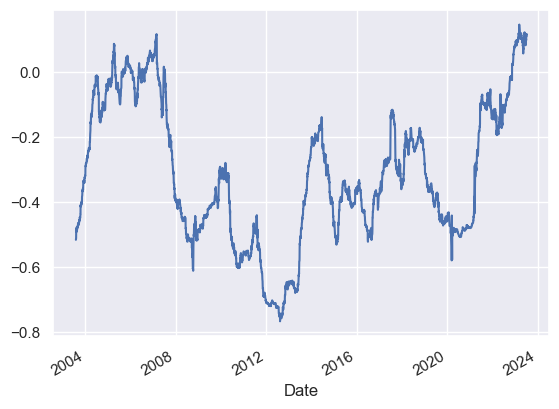

In [48]:
# 롤링 상관계수 시각화
historical_corr.plot()